In [3]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ruta1 =  'ejercicio5.png'
img = cv.imread(ruta1,cv.IMREAD_COLOR)
#fig = plt.figure(figsize=(15, 15))
#fig.add_subplot(221)
#plt.imshow(img)

In [5]:
def Histograma(img):
    resimg = img.copy()
    f,c = resimg.shape
    hst = [0]*256
    fig = plt.figure(figsize=(10, 10)) # Creamos nueva figura

    for x in range(f):
        for y in range(c):
            pixel=resimg[x,y]
            hst[pixel]+=1
    return hst

def expan(img, cmin, cmax):
    # Copiar imagen. 
    resimg = img.copy()
        
    # TODO: Código para el expan.
    i = 0
    while (i < img.shape[0]):
        j = 0
        while(j < img.shape[1]):
            if(img[i][j] < cmin):
                resimg[i][j] = 0
            elif(img[i][j] > cmax):
                resimg[i][j] = 255
            else:
                resimg[i][j] = 0 + ((img[i][j] - cmin) * (255 - 0)) / (cmax - cmin)
            j = j + 1
        i = i + 1
    
    return resimg
 
def corte(img, porc):    
    # TODO: Código para el corte de colas.
    his = Histograma(img)
    npx = sum(his)
    
    # Cálculo de cmin.
    cmin = 1;
    smin = his[cmin]
    while smin < porc*npx:
        cmin = cmin + 1
        smin = smin + his[cmin]
    
    cmax = 255;
    smax = his[cmax]
    while smax < porc*npx:
        cmax = cmax - 1
        smax = smax + his[cmax]
        
    resimg = expan(img, cmin, cmax)
      
    return resimg
 

In [6]:
#Función cortehsv
def cortehsv1(img):
    resimg = img.copy()
    hsv = cv.cvtColor(resimg,cv.COLOR_BGR2HSV)
    h,s,v = cv.split(hsv)
    # Elegimos la componente S y le hacemos corte de cola
    s = corte(s,0.01)
    hsv_split = cv.merge([h, s, v])
    resimg = cv.cvtColor(hsv_split,cv.COLOR_HSV2BGR)
    
    return resimg

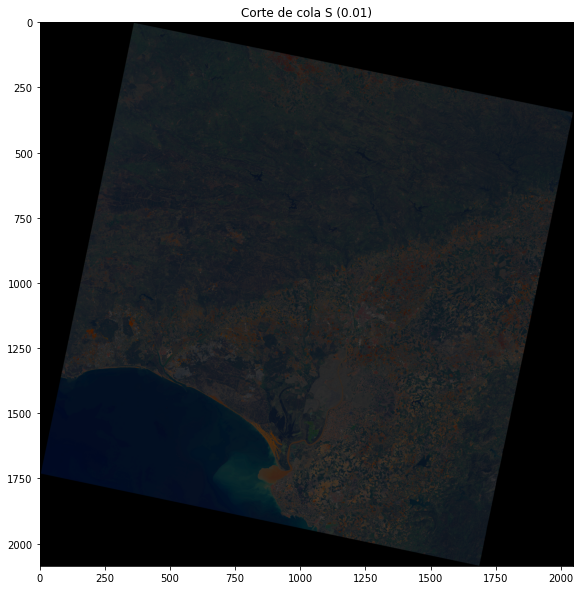

In [7]:
img_exp = cortehsv1(img)
plt.imshow(img_exp)
plt.title("Corte de cola S (0.01)")
plt.show()

In [8]:
#Función cortehsv
def cortehsv2(img):
    resimg = img.copy()
    hsv = cv.cvtColor(resimg,cv.COLOR_BGR2HSV)
    h,s,v = cv.split(hsv)
    #Elegimos la componente V y le hacemos el corte de cola
    v =corte(v,0.01)
    hsv_split = cv.merge([h, s, v])
    resimg = cv.cvtColor(hsv_split,cv.COLOR_HSV2BGR)
    
    return resimg

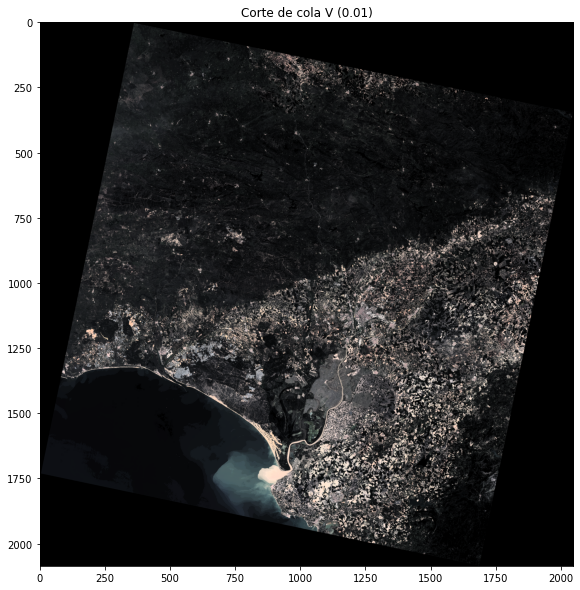

In [9]:
img_exp = cortehsv2(img)
plt.imshow(img_exp)
plt.title("Corte de cola V (0.01)")
plt.show()

In [10]:
#Función cortehsv
def cortehsv3(img):
    resimg = img.copy()
    hsv = cv.cvtColor(resimg,cv.COLOR_BGR2HSV)
    h,s,v = cv.split(hsv)
    # Elegimos la componente S y le hacemos corte de cola
    s = corte(s,0.01)
    #Elegimos la componente V y le hacemos el corte de cola
    v =corte(v,0.01)
    hsv_split = cv.merge([h, s, v])
    resimg = cv.cvtColor(hsv_split,cv.COLOR_HSV2BGR)
    
    return resimg

Corte de colas tanto de la componente S como de la componente V

<Figure size 720x720 with 0 Axes>

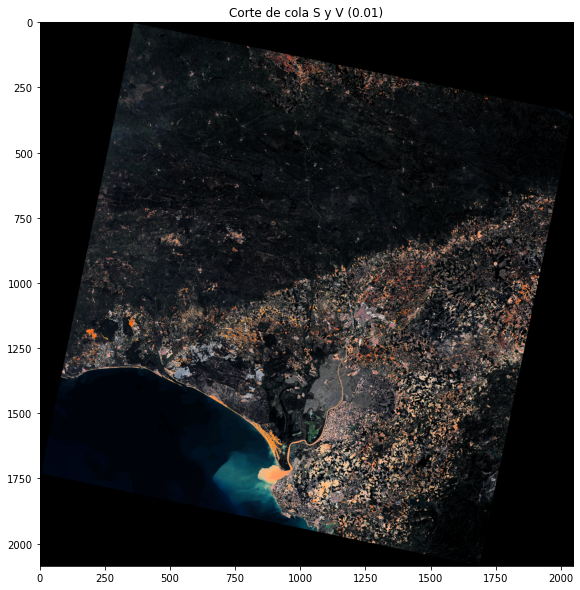

In [11]:
img_exp = cortehsv3(img)
plt.imshow(img_exp)
plt.title("Corte de cola S y V (0.01)")
plt.show()